In [1]:
import matplotlib
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

In [2]:
import torch
from torch import nn
from torch import optim

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import tqdm

In [3]:
data = fetch_california_housing()
X, y = data.data, data.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)

In [5]:
X.shape

(20640, 8)

In [6]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

In [7]:
class RegressionMLPModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, cnt_hidden_layers, output_dim):
        super(RegressionMLPModel, self).__init__()
        self.input = nn.Linear(input_dim, hidden_dim)
        self.hidden = []
        layer_num = int(np.log2(hidden_dim))
        for i in range(min(cnt_hidden_layers, layer_num - 1)):
            f_dim = int(hidden_dim/(2**i))
            o_dim = int(hidden_dim/(2**(i + 1)))
            self.hidden.append(nn.Linear(f_dim, o_dim))
        self.output = nn.Linear(int(hidden_dim / (2**cnt_hidden_layers)), output_dim)

    def forward(self, x):
        x = self.input(x)
        x = torch.relu(x)
        for h in self.hidden:
            x = h(x)
            x = torch.relu(x)
        return self.output(x)

In [8]:
crit = nn.MSELoss()

import matplotlib.pylab

In [9]:
def train(model, crit, optimizer, X_train, y_train, X_test, y_test, n_epochs = 100, batch_size = 10, epsilon=1e-3):
    history = []
    img = []
    batch_start = torch.arange(0, len(X_train), batch_size)
    for epoch in range(n_epochs):
        model.train()
        with tqdm.tqdm(batch_start, unit='batch', mininterval=0, disable=True) as batch:
            for s in batch:
                X_batch = X_train[s:s+batch_size]
                y_batch = y_train[s:s+batch_size]
                # FORWARD
                y_hat = model(X_batch)
                loss = crit(y_hat, y_batch)
                # BACKWARD
                optimizer.zero_grad()
                loss.backward()
                # UPDATE
                optimizer.step()

        model.eval()
        y_hat = model(X_test)
        err = crit(y_hat, y_test)
        if epoch % 10 == 0:
            print(f"Epoch #{epoch}: {err}")
        if epoch % 2 == 0:
            fig, ax = plt.subplots(figsize=(14,10))
            fig.tight_layout(pad=0)
            plt.plot(y_test.detach().numpy()[:100], label="Real", linestyle='--')
            plt.plot(y_hat.detach().numpy()[:100], label="Prediction")
            fig.canvas.draw()
            data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
            data = data.reshape(fig.canvas.get_width_height()[::-1]+(3,))
            img.append(data)
            plt.close()
        history.append(float(err))
        if err < epsilon:
            break
    return history, img

In [10]:
%matplotlib inline
model = RegressionMLPModel(X.shape[1], 24, 2, 1)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
h, imgs = train(model, crit, optimizer, X_train, y_train, X_test, y_test)

Epoch #0: 0.9735904932022095
Epoch #10: 0.5655707120895386
Epoch #20: 0.529154896736145
Epoch #30: 0.5230166912078857
Epoch #40: 0.5145796537399292
Epoch #50: 0.5134357810020447
Epoch #60: 0.5040740966796875
Epoch #70: 0.4984947741031647
Epoch #80: 0.5003053545951843
Epoch #90: 0.4994705617427826


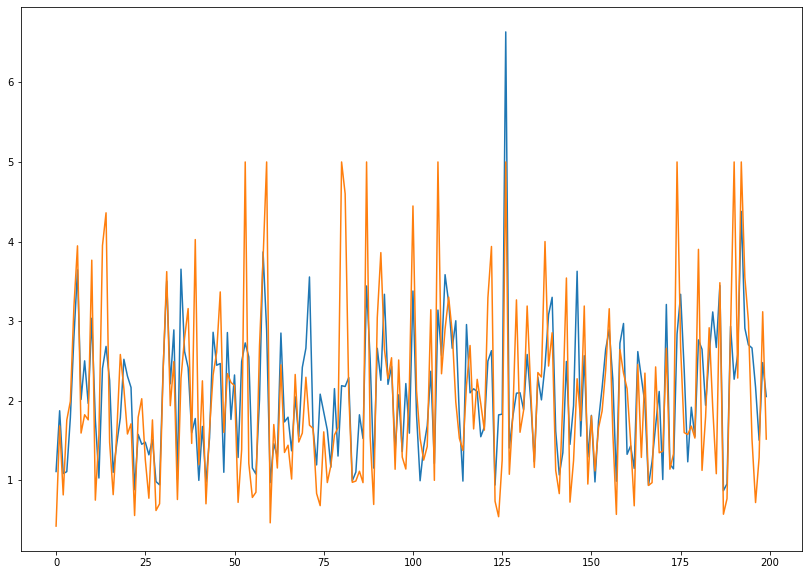

In [16]:
plt.rcParams["animation.html"] = "jshtml"
plt.figure(figsize=(14,10))
y_hat = model(X_test)
plt.plot(y_hat[500:700].detach().numpy())
plt.plot(y_test[500:700])

In [12]:
import matplotlib.animation as animation

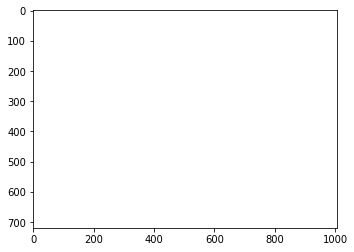

In [13]:
frames = []
fig = plt.figure()
for i in range(len(imgs)):
    frames.append([plt.imshow(imgs[i], animated=True)])
ani = animation.ArtistAnimation(fig, frames, interval=100, blit=True, repeat_delay=1000)
plt.show()
ani

In [14]:
imgs[-1]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]